In [44]:
import os 
import random

import pandas as pd
import numpy as np

import cv2
from PIL import Image
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from timeit import default_timer as timer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Activation,Flatten, Conv2D, MaxPool2D,Dropout

In [2]:
# Load the dataset
all_0 = r"C:\Users\44745\Downloads\C-NMC_Leukemia\training_data\fold_0\all"
all_1 = r"C:\Users\44745\Downloads\C-NMC_Leukemia\training_data\fold_1\all"
all_2 = r"C:\Users\44745\Downloads\C-NMC_Leukemia\training_data\fold_2\all"

hem_0 = r"C:\Users\44745\Downloads\C-NMC_Leukemia\training_data\fold_0\hem"
hem_1 = r"C:\Users\44745\Downloads\C-NMC_Leukemia\training_data\fold_1\hem"
hem_2 = r"C:\Users\44745\Downloads\C-NMC_Leukemia\training_data\fold_2\hem"
path_val = r"C:\Users\44745\Downloads\C-NMC_Leukemia\validation_data\C-NMC_test_prelim_phase_data"
val_labels = pd.read_csv(r"C:\Users\44745\Downloads\C-NMC_Leukemia\validation_data\C-NMC_test_prelim_phase_data_labels.csv")

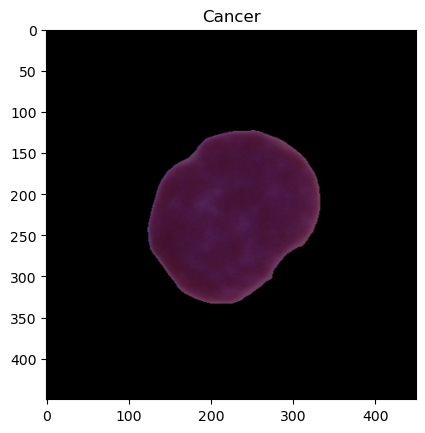

Image location: C:\Users\44745\Downloads\C-NMC_Leukemia\training_data\fold_0\all\UID_22_8_2_all.bmp


In [3]:
# Get random image from all_0 folder
a_image_fnames = os.listdir(all_0)
random_all_image_fname = random.choice(a_image_fnames)
random_all_image_path = os.path.join(all_0, random_all_image_fname)

cancer_img = cv2.imread(random_all_image_path)
plt.imshow(cancer_img)
plt.title('Cancer')
plt.show()

print("Image location:", random_all_image_path)

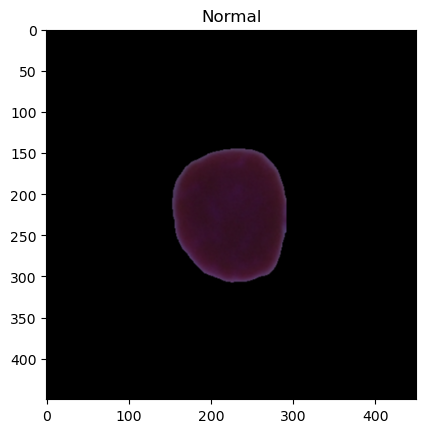

Image location: C:\Users\44745\Downloads\C-NMC_Leukemia\training_data\fold_0\hem\UID_H24_25_9_hem.bmp


In [4]:
# Get random image from hem_0 folder
h_image_fnames = os.listdir(hem_0)
random_hem_image_fname = random.choice(h_image_fnames)
random_hem_image_path = os.path.join(hem_0, random_hem_image_fname)

normal_img = cv2.imread(random_hem_image_path)
plt.imshow(normal_img)
plt.title('Normal')
plt.show()

print("Image location:", random_hem_image_path)

In [5]:
# Get the shape for the images
print("Cancer image shape:", cancer_img.shape)
print("Normal image shape:", normal_img.shape)

Cancer image shape: (450, 450, 3)
Normal image shape: (450, 450, 3)


In [46]:
def get_path_image(folder):
    image_paths = []
    if os.path.exists(folder):
        image_fnames = os.listdir(folder)
        for img_id in range(len(image_fnames)):
            img = os.path.join(folder,image_fnames[img_id])
            image_paths.append(img)  
    else:
        print("error folder not found", folder )
    return image_paths  
#takes a folder as imput and checks if it exists
# returns a list of all images file paths in the folder

In [10]:
#image absolute paths for cancer cells and normal cells
cancer_lst = []

for i in [all_0,all_1,all_2]:
    paths = get_path_image(i)
    cancer_lst.extend(paths)
print('No. of cancer images:', len(cancer_lst))

normal_lst = []
for i in [hem_0,hem_1,hem_2]:
    paths = get_path_image(i)
    normal_lst.extend(paths)
print('No. of normal images:', len(normal_lst)) 

No. of cancer images: 7272
No. of normal images: 3389


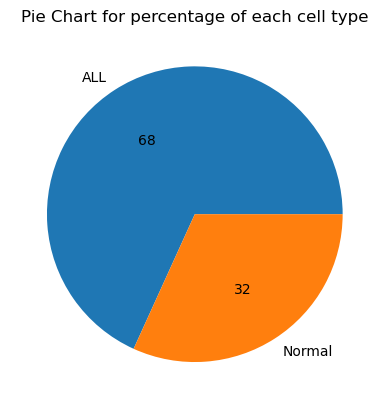

In [11]:
cancer_dict = {"x_col":cancer_lst, "y_col":[np.nan for x in range(len(cancer_lst))]}
cancer_dict["y_col"] = "ALL"

normal_dict = {"x_col":normal_lst, "y_col":[np.nan for x in range(len(normal_lst))]}
normal_dict["y_col"] = "HEM"

cancer_df = pd.DataFrame(cancer_dict)
normal_df = pd.DataFrame(normal_dict)

plt.pie([len(cancer_lst),len(normal_lst)],labels=["ALL","Normal"],autopct='%.f')
plt.title('Pie Chart for percentage of each cell type')
plt.show()

In [13]:
#test_data = r"C:\Users\44745\Downloads\C-NMC_Leukemia\testing_data\C-NMC_test_final_phase_data"
validation_list = get_path_image(path_val)
#test_list = get_path_image(test_data)

In [14]:
from sklearn.model_selection import train_test_split

# Load the images and labels
X_train, y_train = [], []
for i in cancer_lst:
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))  
    X_train.append(img)
    y_train.append(1)
for i in normal_lst:
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))  
    X_train.append(img)
    y_train.append(0)

# Split the training data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Load the validation data
X_val, y_val = [], []
for i in validation_list:
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))  
    X_val.append(img) 
y_val = val_labels["labels"].values

# Convert the data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [16]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

print("y_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8528, 224, 224, 3)
y_train shape: (8528,)
X_val shape: (1867, 224, 224, 3)
y_val shape: (1867,)
y_test shape: (2133, 224, 224, 3)
y_test shape: (2133,)


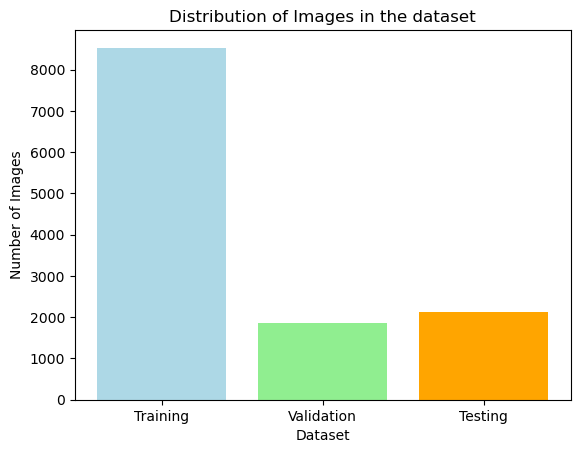

In [27]:
import matplotlib.pyplot as plt

# Get the number of images in each set
train_size = len(X_train)
val_size = len(X_val)
test_size = len(X_test)

# Create a bar chart
labels = ['Training', 'Validation', 'Testing']
sizes = [train_size, val_size, test_size]
colors = ['lightblue', 'lightgreen', 'orange']
plt.bar(labels, sizes, color=colors)

# Add labels and title
plt.xlabel("Dataset")
plt.ylabel("Number of Images")
plt.title("Distribution of Images in the dataset")

# Display the plot
plt.show()


In [17]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
        
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 flatten (Flatten)           (None, 380192)            0         
                                                                 
 dense (Dense)               (None, 16)                6083088   
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                        

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall'])

In [21]:
start = timer()
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))
end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/15
267/267 [==============================] - 156s 577ms/step - loss: 2.1629 - accuracy: 0.7535 - recall: 0.8855 - val_loss: 0.9763 - val_accuracy: 0.6277 - val_recall: 0.9130
Epoch 2/15
267/267 [==============================] - 196s 735ms/step - loss: 0.4693 - accuracy: 0.8124 - recall: 0.9003 - val_loss: 0.7347 - val_accuracy: 0.5458 - val_recall: 0.6169
Epoch 3/15
267/267 [==============================] - 193s 722ms/step - loss: 0.4243 - accuracy: 0.8308 - recall: 0.8957 - val_loss: 0.8971 - val_accuracy: 0.6111 - val_recall: 0.8458
Epoch 4/15
267/267 [==============================] - 185s 691ms/step - loss: 0.3912 - accuracy: 0.8472 - recall: 0.8984 - val_loss: 1.2649 - val_accuracy: 0.6213 - val_recall: 0.8753
Epoch 5/15
267/267 [==============================] - 184s 690ms/step - loss: 0.3432 - accuracy: 0.8659 - recall: 0.8998 - val_loss: 0.9807 - val_accuracy: 0.5892 - val_recall: 0.8007
Epoch 6/15
267/267 [==============================] - 180s 674ms/step - loss: 0.

In [25]:
model.evaluate(X_val, y_val)

59/59 [==============================] - 28s 468ms/step - loss: 4.5364 - accuracy: 0.6122 - recall: 0.8696


[4.536431789398193, 0.6122121214866638, 0.8695651888847351]

In [40]:
test_result = model.evaluate(X_test, y_test, verbose=2)
print("Test result:", test_result)

67/67 - 30s - loss: 1.2495 - accuracy: 0.8223 - recall: 0.9210 - 30s/epoch - 445ms/step
Test result: [1.2494524717330933, 0.8223159909248352, 0.9209622144699097]


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Get the predicted probabilities for the test set
y_pred_proba = model.predict(X_test)

# Apply a threshold of 0.5 to get the predicted classes
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion matrix:')
print(conf_mat)


67/67 [==============================] - 29s 426ms/step
Precision: 0.8354114713216958
Recall: 0.9209621993127147
F1 score: 0.8761033017325922
Confusion matrix:
[[ 414  264]
 [ 115 1340]]


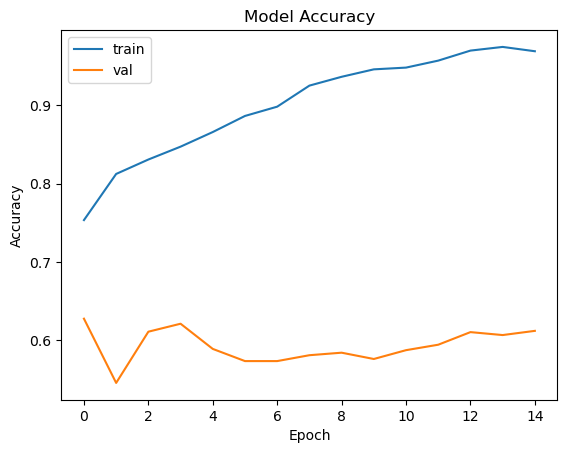

In [42]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

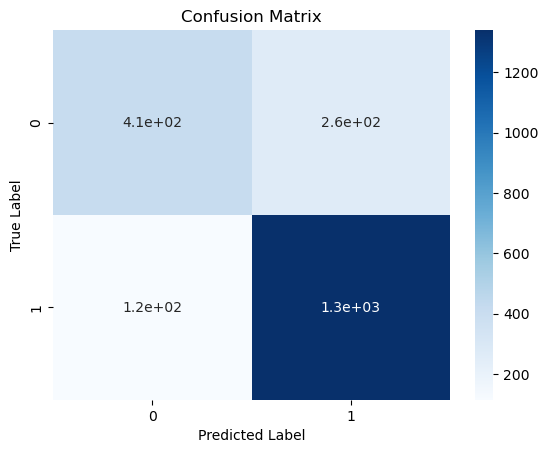

In [45]:
# Plot the heatmap
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()